ID3 Decision Tree Implementation

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



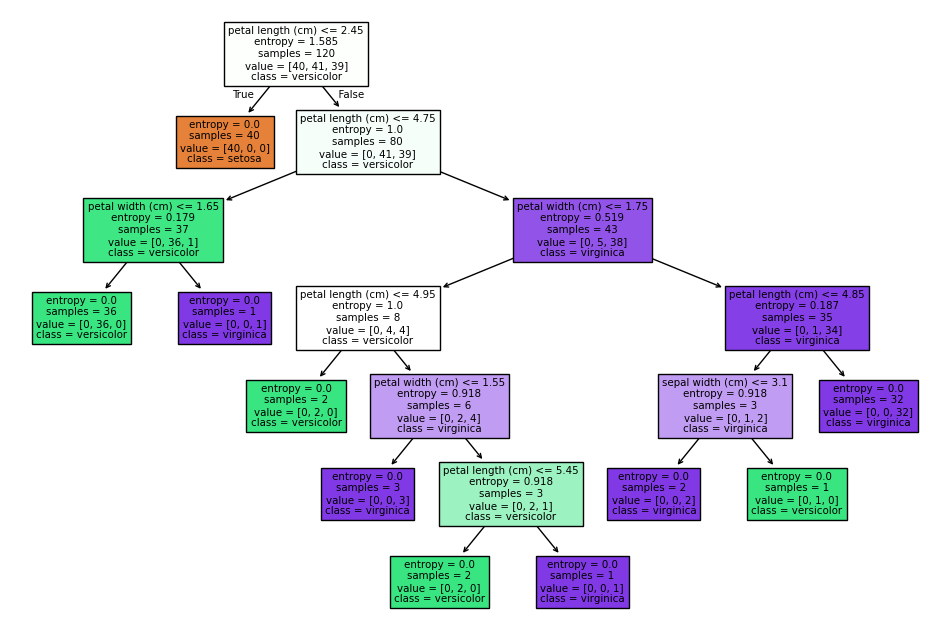

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

id3_model = DecisionTreeClassifier(
    criterion='entropy',   
    max_depth=None,        
    random_state=42
)

id3_model.fit(X_train, y_train)

y_pred = id3_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(
    id3_model,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True
)
plt.show()

CART decision tree Implementation

Accuracy: 0.9473684210526315

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



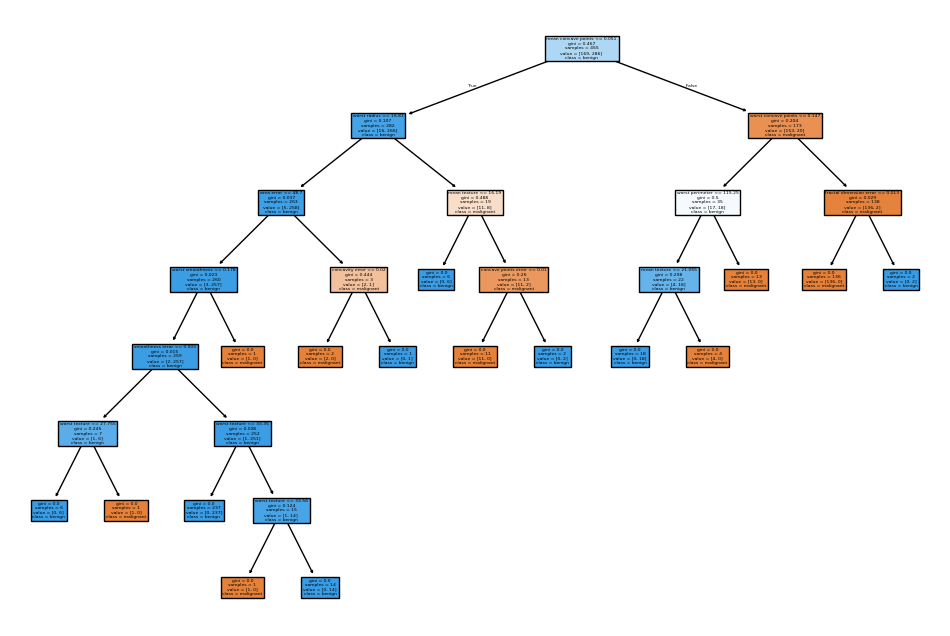

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cart_model = DecisionTreeClassifier(
    criterion='gini',    
    max_depth=None,     
    random_state=42
)

cart_model.fit(X_train, y_train)

y_pred = cart_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(
    cart_model,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True
)
plt.show()

Accuracy: 0.7142857142857143


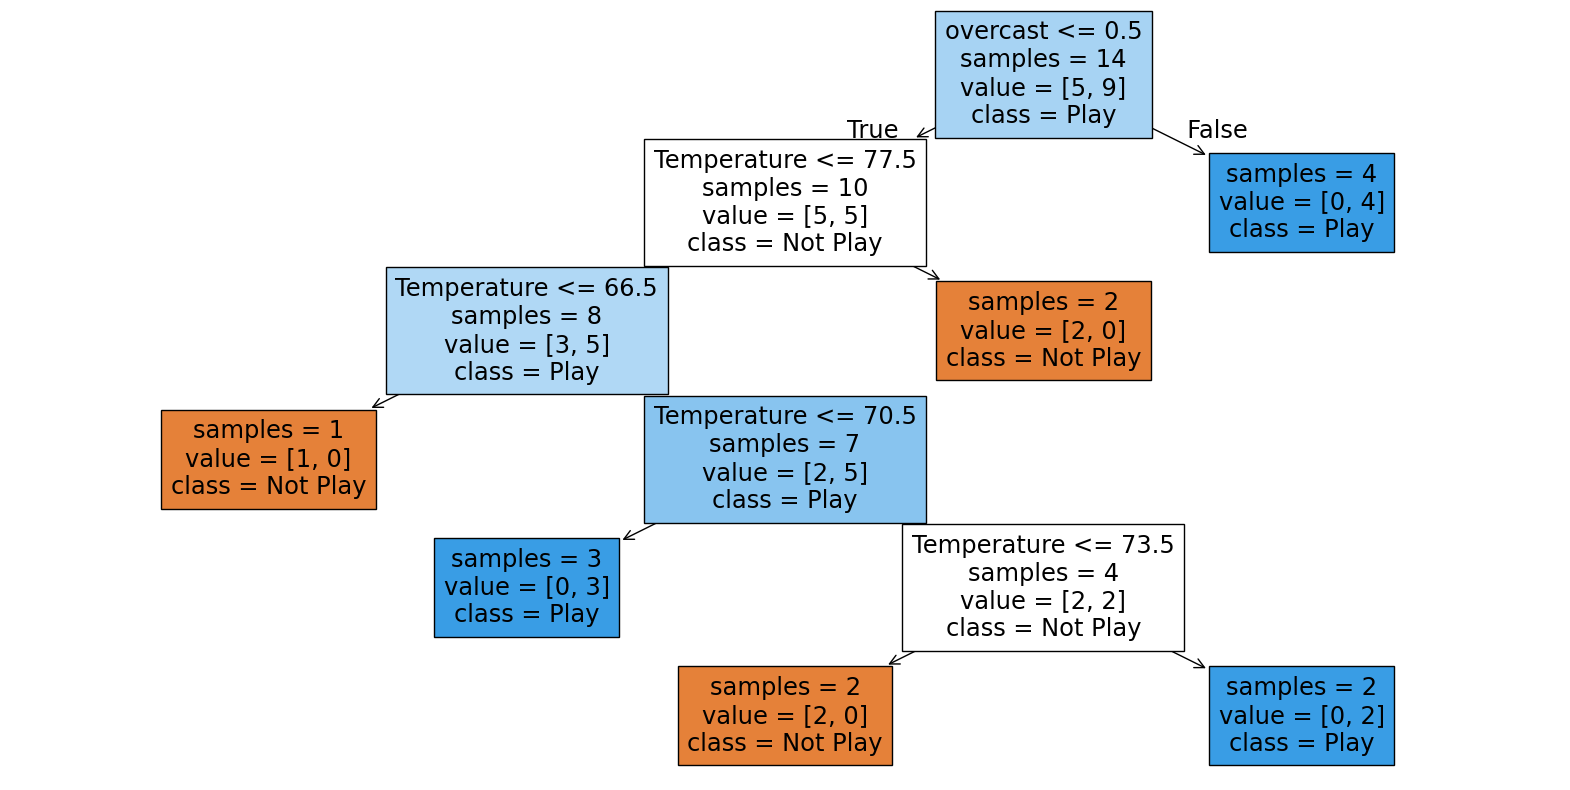

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

dt_clf = DecisionTreeClassifier(
    max_depth=None,           
    min_samples_split=2,      
    min_samples_leaf=1,       
    criterion='gini'          
)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()

OneR Algorithm

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

X = df.drop(columns=['PlayTennis'])
y = df['PlayTennis']

def oneR(X, y):
    best_feature = None
    best_rules = {}
    lowest_error = float('inf')

    for col in X.columns:
        rules = {}
        for val in X[col].unique():
            subset = y[X[col] == val]
            most_common = subset.mode()[0]
            rules[val] = most_common

        predictions = X[col].map(rules)
        error = sum(predictions != y)

        print(f"Feature '{col}' has error rate {error}/{len(y)}")

        if error < lowest_error:
            lowest_error = error
            best_feature = col
            best_rules = rules

    return best_feature, best_rules, lowest_error

feature, rules, error = oneR(X, y)

print("\n Best Feature:", feature)
print(" Rules:", rules)
print(" Error:", error)

def predict_oneR(X, feature, rules, default='Yes'):
    return X[feature].map(rules).fillna(default)

y_pred = predict_oneR(X, feature, rules)
accuracy = accuracy_score(y, y_pred)

print("\n🎯 OneR Accuracy:", round(accuracy * 100, 2), "%")


Feature 'Outlook' has error rate 4/14
Feature 'Temperature' has error rate 5/14
Feature 'Humidity' has error rate 4/14
Feature 'Windy' has error rate 5/14

 Best Feature: Outlook
 Rules: {'Sunny': 'No', 'Overcast': 'Yes', 'Rain': 'Yes'}
 Error: 4

🎯 OneR Accuracy: 71.43 %


In [11]:
from itertools import combinations

transactions = [
    {'A', 'B', 'C'},
    {'A', 'C'},
    {'A', 'D'},
    {'B', 'C', 'D'}
]

min_support = 0.5
min_confidence = 0.7

items = sorted(set().union(*transactions))
N = len(transactions)

def get_support(itemset):
    count = sum(itemset.issubset(t) for t in transactions)
    return count / N

frequent_itemsets = []
for i in range(1, len(items)+1):
    for combo in combinations(items, i):
        itemset = set(combo)
        support = get_support(itemset)
        if support >= min_support:
            frequent_itemsets.append((itemset, support))

print("Frequent Itemsets:")
for item, sup in frequent_itemsets:
    print(f"{item} : {sup:.2f}")

print("\nAssociation Rules:")
for itemset, sup in frequent_itemsets:
    if len(itemset) > 1:
        for i in range(1, len(itemset)):
            for A in combinations(itemset, i):
                A = set(A)
                B = itemset - A
                conf = get_support(itemset) / get_support(A)
                if conf >= min_confidence:
                    print(f"{A} → {B} (conf: {conf:.2f}, support: {sup:.2f})")


Frequent Itemsets:
{'A'} : 0.75
{'B'} : 0.50
{'C'} : 0.75
{'D'} : 0.50
{'C', 'A'} : 0.50
{'C', 'B'} : 0.50

Association Rules:
{'B'} → {'C'} (conf: 1.00, support: 0.50)
